In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('dataset.xlsx')

In [3]:
df

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Child 44,2015,6.4,4,1210000,50000000.0,66.0,1,4,3701061,9325,641,1859,NaN
227,Aloha,2015,5.5,15,21000000,37000000.0,2815.0,1,13,7119456,18803,1128,2290,NaN
228,Unfinished Business,2015,5.4,8,10200000,35000000.0,2777.0,1,7,3450614,6823,325,409,NaN
229,War Room,2015,5.4,1,12300000,3000000.0,NaN,1,10,66872,400,67,201,NaN


In [4]:
df['Sentiment'].nunique()

36

In [5]:
import seaborn as sns

<AxesSubplot: >

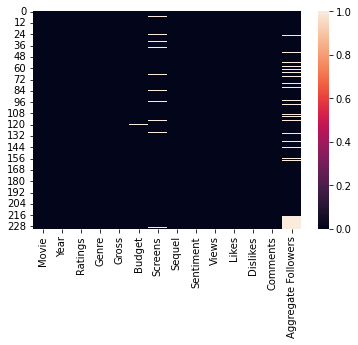

In [6]:
sns.heatmap(df.isna())

In [12]:
df['Genre'].unique()# missing 5,11,13,14

array([ 8,  1,  3, 10, 15, 12,  9,  2,  7,  6,  4])

In [8]:
df['Ratings'].nunique()

45

In [10]:
df['Sequel'].unique()

array([1, 2, 3, 5, 6, 4, 7])

In [11]:
df['Sentiment'].unique()

array([  0,   2,   3,   4,  29,  -1,  -2,   9,   5,  -4,   1,   6, -11,
        -9,  14,  10,  -5,  27,  13,   8,   7,  17,  20,  -3,  11,  -6,
        21, -17,  15,  -8,  19,  16, -38,  25,  18,  26])